# Esercitazione 11
L'esercitazione 11 richiede l'implementazione di una rete neurale attraverso la libreria _Keras_ di Python per la costruzione di una regressione lineare. 

## Esercizio 11.1
L'esercizio richiede che si studi il comportmento della rete neurale al variare dei suoi parametri: il numero di epoche, di dati di test e di rumore sugli stessi.

2023-10-26 15:32:10.193223: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 15:32:10.257333: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 15:32:10.258154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 15:32:11.149625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


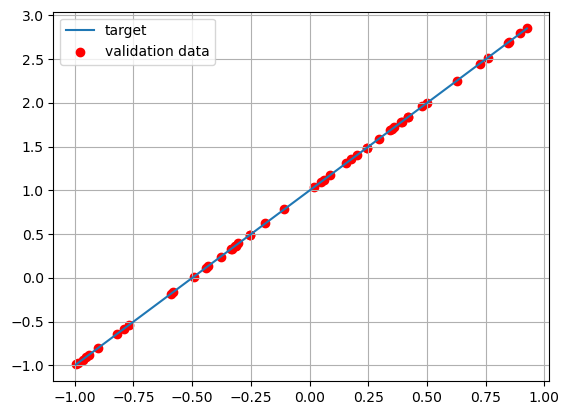

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 14ms/step - loss: 3.8561 - mse: 3.8561 - val_loss: 2.9202 - val_mse: 2.9202
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 2.9022 - mse: 2.9022 - val_loss: 2.2429 - val_mse: 2.2429
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 2.2351 - mse: 2.2351 - val_loss: 1.7539 - val_mse: 1.7539
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 1.7462 - mse: 1.7462 - val_loss: 1.3797 - val_mse: 1.3797
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 1.3720 - mse: 1.3720 - val_loss: 1.0961 - val_mse: 1.0961
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0867 - mse: 1.0867 - val_loss: 0.8764 - val_mse: 0.8764
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.8663 - mse: 0.8663 - val_loss: 0.7027 - val_mse: 0.7027
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6926 - mse: 0.6

In [7]:
# return weights and biases
model.get_weights()

[array([[1.8784814]], dtype=float32), array([0.99835354], dtype=float32)]